
# Project: Investigate a Dataset (TMDB Top 10,000 Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The reason for this investigation is to gain an insight into the tmdb 10,000 movies, and I have three questions that will need answers...

- What Is The Most Profitable Movie?
- Which Movie Has The Highest and lowest Figures?
- What Is The Most Popular Movie Genres?

I'll answer those questions using exploratory data analysis methods, but first, I need to wrangle these data to make sure I'm not messing things up.

In [3]:
# Import all of the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> I'll use data wrangling method to load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load tmdb data.
df = pd.read_csv('tmdb-movies.csv')
#  Print out a few lines.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### I'll perform some operations to inspect data types and look for instances of missing or possibly errant data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Exploring the datatypes

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Exploring the sum of the missing values

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Explorng the statistical details of the dataset

In [8]:
df.duplicated().sum()

1

> Chech for duplicates

In [9]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> Check out the count nonnull observations in each series

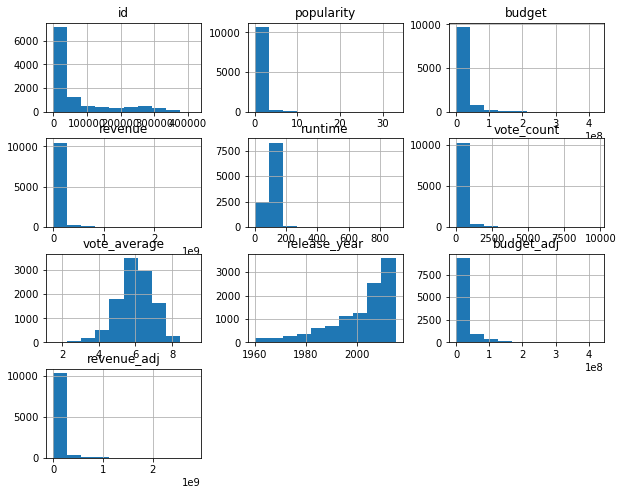

In [10]:
df.hist(figsize=(10,8));

> Using histogram to chech the statistical pattern in each series

#### After discussing the structure of the data and any problems that need to be cleaned, I'll perform those cleaning steps in the second part of this section.

> **1st Observation **: I need to drop some columns in order to get rid of the unnecessary data.

> **2nd Observation **: I'll replace the Null values in dataframe using .fillna().

> **3rd Observation **: I'll delete the Null values in dataframe using .dropna().

> **4th Observation **: I'll change "release_date" from string to datetime.

> **5th Observation **: I'll split the "|" from "genres" and "production_companies" cells using lambda.

### Data Cleaning (Replace this withmore specific notes!)

In [11]:
df = df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   overview              10862 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

> I droped some columns in order to get rid of the unnecessary values.

In [12]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   overview              10862 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

<ipython-input-12-b314f631aa90>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


> I replaced the null values in each series with the mean.

In [13]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9826 non-null   int64  
 1   popularity            9826 non-null   float64
 2   budget                9826 non-null   int64  
 3   revenue               9826 non-null   int64  
 4   original_title        9826 non-null   object 
 5   overview              9826 non-null   object 
 6   runtime               9826 non-null   int64  
 7   genres                9826 non-null   object 
 8   production_companies  9826 non-null   object 
 9   release_date          9826 non-null   object 
 10  vote_count            9826 non-null   int64  
 11  vote_average          9826 non-null   float64
 12  release_year          9826 non-null   int64  
 13  budget_adj            9826 non-null   float64
 14  revenue_adj           9826 non-null   float64
dtypes: float64(4), int64

> I removed the remaining null values.

In [14]:
df.head()

,id,popularity,budget,revenue,original_title,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Checking out if my edits worked after all.

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9826 non-null   int64         
 1   popularity            9826 non-null   float64       
 2   budget                9826 non-null   int64         
 3   revenue               9826 non-null   int64         
 4   original_title        9826 non-null   object        
 5   overview              9826 non-null   object        
 6   runtime               9826 non-null   int64         
 7   genres                9826 non-null   object        
 8   production_companies  9826 non-null   object        
 9   release_date          9826 non-null   datetime64[ns]
 10  vote_count            9826 non-null   int64         
 11  vote_average          9826 non-null   float64       
 12  release_year          9826 non-null   int64         
 13  budget_adj       

> I converted the "release_date" datatype to datetime.

In [16]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])
df.head()

,id,popularity,budget,revenue,original_title,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> Finally, I removed The vertical bar "|" from "genres" and "production_companies".

<a id='eda'></a>
## Exploratory Data Analysis

Now that I finally cleaned the dataset, I'll be able to answer whatever questions that might came in mind, but I will ask just these 3 questions...

- What Is The Most Profitable Movie?
- Which Movie Has The Highest and lowest Figures?
- What Is The Most Popular Movie Genres?

### Research Question 1 (What Is The Most Profitable Movie?)

In [17]:
df['profits'] = df['revenue'] - df['budget']
df.sort_values(by=['profits'], ascending = False).head()

,id,popularity,budget,revenue,original_title,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
1386,19995,9.432768,237000000,2781505847,Avatar,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama,Paramount Pictures,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


> I created a new series called "profits" to check for the most profitable movie in the dataset.

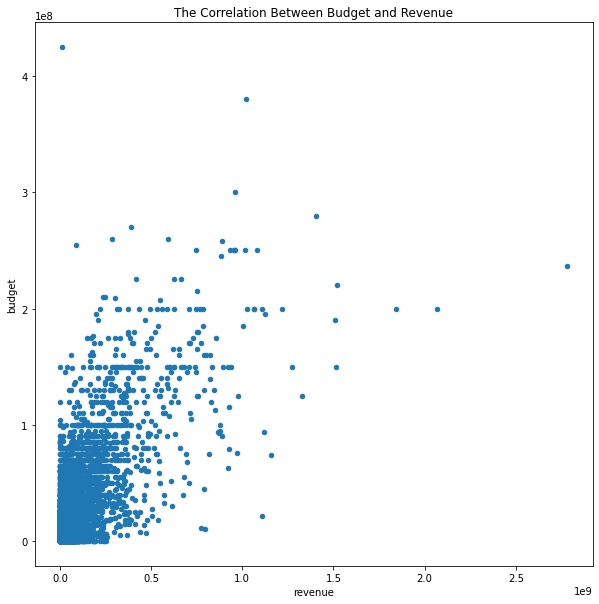

In [18]:
df.plot(x='revenue', y='budget', kind='scatter', title = 'The Correlation Between Budget and Revenue', figsize=(10,10));

> I used scatter plot to check if there are a correlation between budget and revenue.

#### *Answer 1:* It doesn't seems like there're a significant correlation between movies with high budget and high Revenue!

### Research Question 2  (Which Movie Has The Highest and lowest Figures?)

In [19]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high = df[column].idxmax()
    high_details = df.loc[high]
    
    #for lowest earned profit
    low = df[column].idxmin()
    low_details = df.loc[low]
    
    #collectin data in one place
    info = pd.concat([high_details, low_details], axis=1)
    
    
    return info

#calling the function
calculate('profits')

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100
genres,Action,Adventure
production_companies,Ingenious Film Partners,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> The most profitable movie is $"Avatar"$ by 2,544,505,847 profits. Interestingly, the most plummeted is $"The Warrior's Way"$ by 413,912,431 losses.

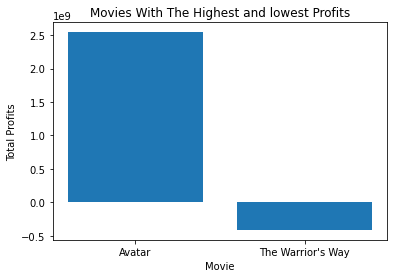

In [20]:
locations = [1, 2]
heights = [2544505847, -413912431]
labels = ['Avatar', "The Warrior's Way"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Profits')
plt.xlabel('Movie')
plt.ylabel('Total Profits');

> This table shows the deference between profits of the two movies.

In [21]:
calculate('budget')

,2244,30
id,46528,280996
popularity,0.25054,3.927333
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
overview,An Asian assassin (Dong-gun Jang) is forced to...,"The story is set in 1947, following a long-ret..."
runtime,100,103
genres,Adventure,Mystery
production_companies,Boram Entertainment Inc.,BBC Films
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


> The biggest movie budget is $"The Warrior's Way"$ by 425,000,000 USD.

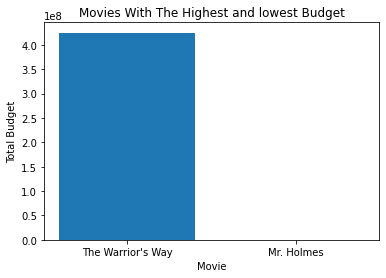

In [22]:
locations = [1, 2]
heights = [425000000, 0]
labels = ["The Warrior's Way", 'Mr. Holmes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Budget')
plt.xlabel('Movie')
plt.ylabel('Total Budget');

> This table shows the deference between the budget of the highest and lowest movie.

In [23]:
calculate('revenue')

,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
overview,"In the 22nd century, a paraplegic Marine is di...",When a Las Vegas bodyguard with lethal skills ...
runtime,162,92
genres,Action,Thriller
production_companies,Ingenious Film Partners,Current Entertainment
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


> The highest movie revenue is $"Avatar"$ by 2,781,505,847 USD.

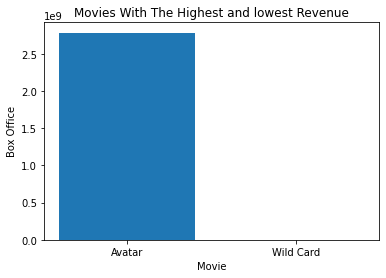

In [24]:
locations = [1, 2]
heights = [2781505847, 0]
labels = ['Avatar', 'Wild Card']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Revenue')
plt.xlabel('Movie')
plt.ylabel('Box Office');

> This table shows the deference between the revenues of the highest and lowest movie.

In [25]:
calculate('runtime')

,4041,92
id,150004,370687
popularity,0.469332,1.876037
budget,0,0
revenue,0,0
original_title,Taken,Mythica: The Necromancer
overview,"Taken spans five decades and four generations,...",Mallister takes Thane prisoner and forces Mare...
runtime,877,0
genres,Science Fiction,Fantasy
production_companies,DreamWorks,Arrowstorm Entertainment
release_date,2002-12-02 00:00:00,2015-12-19 00:00:00


> The longest movie runtime is $"Taken"$.

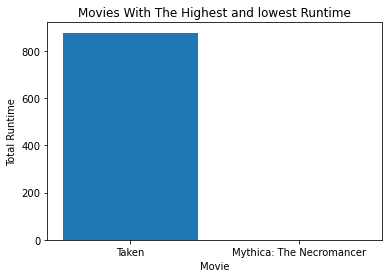

In [26]:
locations = [1, 2]
heights = [877, 0]
labels = ['Taken', 'Mythica: The Necromancer']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Runtime')
plt.xlabel('Movie')
plt.ylabel('Total Runtime');

> This table shows the deference between the total runtime of the longest and shortest movie.

In [27]:
calculate('vote_count')

,1919,240
id,27205,363689
popularity,9.363643,0.5327
budget,160000000,0
revenue,825500000,0
original_title,Inception,The Unspoken
overview,"Cobb, a skilled thief who commits corporate es...",In 1997 the close-knit Anderson family vanishe...
runtime,148,90
genres,Action,Thriller
production_companies,Legendary Pictures,Lighthouse Pictures
release_date,2010-07-14 00:00:00,2015-10-24 00:00:00


> The highest voted movie is $"Inception"$ by 9767 votes.

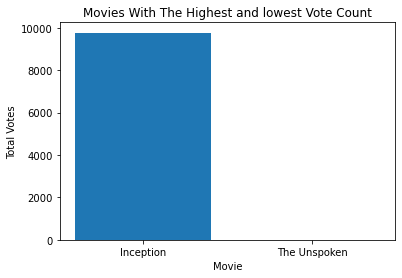

In [28]:
locations = [1, 2]
heights = [9767, 10]
labels = ['Inception', 'The Unspoken']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Vote Count')
plt.xlabel('Movie')
plt.ylabel('Total Votes');

> This table shows the deference between the number of votes of the highest and lowest movie.

In [29]:
calculate('vote_average')

,6911,7772
id,24970,25055
popularity,0.21201,0.12112
budget,0,0
revenue,0,0
original_title,Pink Floyd: Pulse,Transmorphers
overview,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,About a race of alien robots that have conquer...
runtime,145,86
genres,Music,Action
production_companies,SMV Enterprises,"Asylum, The"
release_date,2006-07-09 00:00:00,2007-06-26 00:00:00


> The highest rated movie is $"Pink Floyd: Pulse"$ by 8.7.

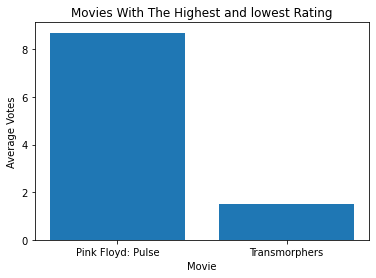

In [30]:
locations = [1, 2]
heights = [8.7, 1.5]
labels = ['Pink Floyd: Pulse', 'Transmorphers']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movies With The Highest and lowest Rating')
plt.xlabel('Movie')
plt.ylabel('Average Votes');

> This table shows the deference between rating of the highest and lowest movie.

In [31]:
calculate('popularity')

,0,9977
id,135397,32082
popularity,32.985763,0.000188
budget,150000000,0
revenue,1513528810,0
original_title,Jurassic World,The Hospital
overview,Twenty-two years after the events of Jurassic ...,Black comedy in which a suicidal doctor strugg...
runtime,124,103
genres,Action,Mystery
production_companies,Universal Studios,Simcha Productions
release_date,2015-06-09 00:00:00,1971-12-14 00:00:00


> The most popular movie is $"Jurassic World"$.

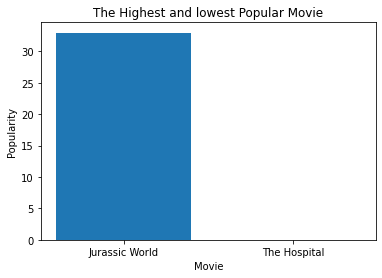

In [32]:
locations = [1, 2]
heights = [32.985763, 0.000188]
labels = ['Jurassic World', 'The Hospital']
plt.bar(locations, heights, tick_label=labels)
plt.title('The Highest and lowest Popular Movie')
plt.xlabel('Movie')
plt.ylabel('Popularity');

> This table shows the deference between the popularity of the most and leas movie.

#### *Answer 2:* The reason for this question was to identify the significant between the high and low figures in the dataset, which BTW shows a big difference in comparison bbetween each of the series (i.e. 
- *$Profits:$* {[Highest: **Avatar**] , [Lowest: **The Warrior's Way**]}
- *$Budget:$* {[Highest: **The Warrior's Way**] , [Lowest: **Mr. Holmes**]}
- *$Revenue:$* {[Highest: **Avatar**] , [Lowest: **Wild Card**]}
- *$Runtime:$* {[Highest: **Taken**] , [Lowest: Mythica: **The Necromancer**]}
- *$Vote Count:$* {[Highest: **Inception**] , [Lowest: **The Unspoken**]}
- *$Vote Average:$* {[Highest: **Pink Floyd: Pulse**] , [Lowest: **Transmorphers**]}
- *$Popularity:$* {[Highest: **Jurassic World**] , [Lowest: **The Hospital**]})

### Research Question 3  (What Is The Most Popular Movie Genres?)

In [33]:
df_pop = df.groupby(['genres'])['popularity'].mean()
df_pop

genres
Action             0.874669
Adventure          1.275178
Animation          0.867762
Comedy             0.571626
Crime              0.719409
Documentary        0.207653
Drama              0.586444
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.523559
Mystery            0.621116
Romance            0.786560
Science Fiction    1.150894
TV Movie           0.267006
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64

> Checking the mean of each genres' popularity.

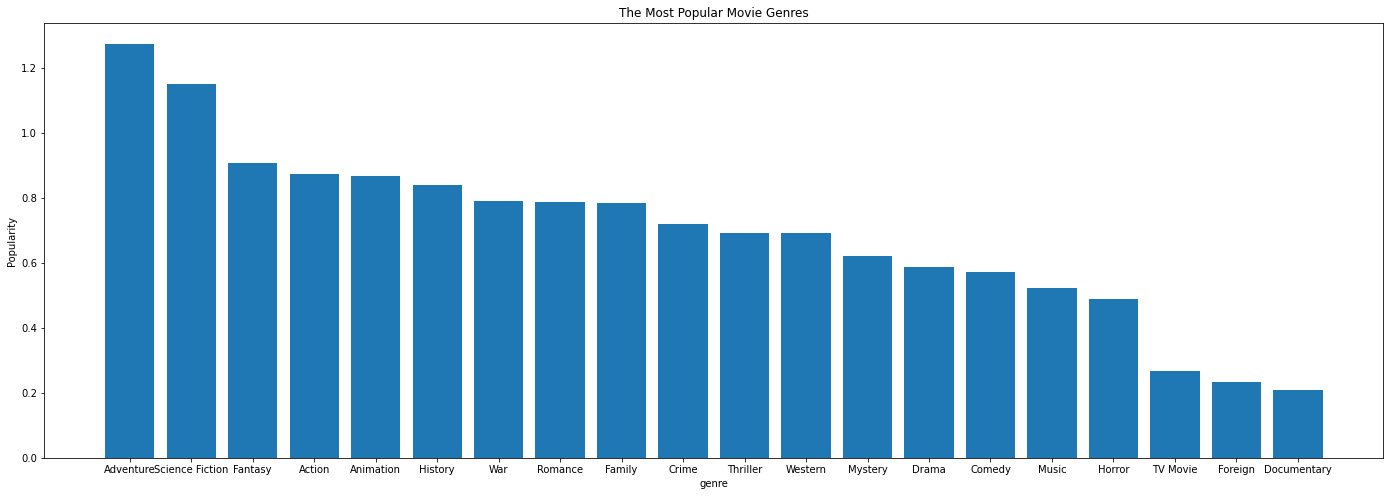

In [34]:
df_pop.sort_values(ascending = False, inplace = True)
plt.subplots(figsize=(24, 8))
plt.bar(df_pop.index, df_pop)
plt.title('The Most Popular Movie Genres')
plt.xlabel('genre')
plt.ylabel('Popularity');

> Ranking the most to least popular movie genres according to the dataset.

#### *Answer 3:* This was a street forward question, and the answer of which is the most popular movie genre is... **"Adventure"**. Definitely my favorite genre as well.

<a id='conclusions'></a>
## Conclusions

#### I really enjoyed this interesting data analysis task, and here's what I have found :

> 1. It doesn't have to be a big budget for a movie to be profitable.
> 2. There are a significant gap between the high and low figures in the dataset.
> 3. The most successful genres are: **Adventure** and the crown jewel of this genre is **Jurassic World**.


### I know for sure that if I invested more time and effort on this analysis I can came up with much more interesting findings like the best cast, the best month of release, the minimum budget to invest, and a lot more.

> **Limitations:** *This analysis was done considering the movies with significant profit, highest numbers, and genre popularity. However, These outputs might not be completely error-free due to the uncertainty of the accuracy level of the dataset. We are not sure if the dataset is %100 valid and up-to-date, I even had to drop some columns in order to perform this analysis. Nonetheless, I think these outputs gave us relative indications of the movie industry.*